# Purpose

The purpose of this notebook is to create a model which is capable of classifying our various types of potato chips.

# Let's start by creating a training and test set.

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
!ls custom_dataset/classes/

cheetos  coolrange  nachocheese  original  popcorn  sourcream


In [25]:
img = load_img('custom_dataset/classes/nachocheese/6.jpg')

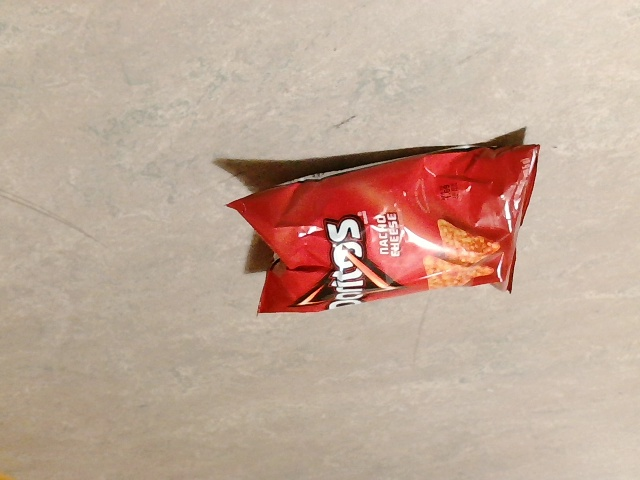

In [26]:
img

In [13]:
x = img_to_array(img)

In [14]:
x = x.reshape((1,) + x.shape)

In [15]:
x

array([[[[189., 177., 153.],
         [188., 176., 152.],
         [188., 176., 154.],
         ...,
         [229., 217., 195.],
         [227., 212., 191.],
         [225., 210., 189.]],

        [[188., 176., 152.],
         [190., 178., 154.],
         [190., 178., 156.],
         ...,
         [226., 214., 192.],
         [227., 212., 191.],
         [228., 213., 192.]],

        [[185., 173., 151.],
         [188., 176., 154.],
         [188., 176., 154.],
         ...,
         [222., 209., 190.],
         [221., 208., 189.],
         [223., 210., 191.]],

        ...,

        [[178., 137.,  73.],
         [175., 135.,  73.],
         [175., 135.,  76.],
         ...,
         [211., 195., 180.],
         [211., 195., 180.],
         [211., 195., 180.]],

        [[183., 137.,  62.],
         [181., 137.,  64.],
         [180., 137.,  68.],
         ...,
         [209., 193., 178.],
         [210., 194., 179.],
         [210., 194., 179.]],

        [[182., 135.,  55.],
       

In [20]:
!mkdir preview

In [21]:
i = 0

In [22]:
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_format="jpeg"):
    i += 1
    if i > 20:
        break

In [23]:
!ls preview

_0_172.jpeg   _0_3448.jpeg  _0_4500.jpeg  _0_67.jpeg	_0_9115.jpeg
_0_2296.jpeg  _0_3540.jpeg  _0_4556.jpeg  _0_7699.jpeg
_0_2981.jpeg  _0_365.jpeg   _0_5412.jpeg  _0_7967.jpeg
_0_3277.jpeg  _0_3961.jpeg  _0_6014.jpeg  _0_8408.jpeg
_0_3430.jpeg  _0_4019.jpeg  _0_6172.jpeg  _0_8943.jpeg


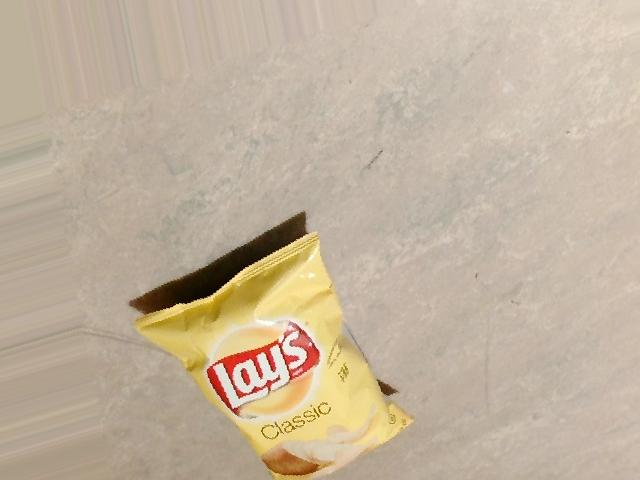

In [24]:
load_img("preview/_0_172.jpeg")

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(640, 426, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
batch_size = 1

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [14]:
x.shape

NameError: name 'x' is not defined

In [15]:
train_generator = train_datagen.flow_from_directory("chips_pictures/", batch_size=batch_size, class_mode="categorical", target_size=(640, 426))

Found 6 images belonging to 6 classes.


In [ ]:
train_generator.filenames

In [16]:
model.fit_generator(train_generator, epochs=5000, steps_per_epoch=100)

Epoch 1/5000
100/100 [==============================] - 50s 504ms/step - loss: 13.1388 - acc: 0.1400
Epoch 2/5000
100/100 [==============================] - 50s 496ms/step - loss: 3.8045 - acc: 0.1700
Epoch 3/5000
100/100 [==============================] - 49s 494ms/step - loss: 1.5831 - acc: 0.3200
Epoch 4/5000
100/100 [==============================] - 998s 10s/step - loss: 1.5614 - acc: 0.5200
Epoch 5/5000
100/100 [==============================] - 759s 8s/step - loss: 1.0415 - acc: 0.6000
Epoch 6/5000
100/100 [==============================] - 5645s 56s/step - loss: 0.7097 - acc: 0.8300
Epoch 7/5000
100/100 [==============================] - 1363s 14s/step - loss: 0.5140 - acc: 0.8100
Epoch 8/5000
100/100 [==============================] - 9273s 93s/step - loss: 0.5450 - acc: 0.8400
Epoch 9/5000
100/100 [==============================] - 15194s 152s/step - loss: 0.6373 - acc: 0.8600
Epoch 10/5000
100/100 [==============================] - 52s 516ms/step - loss: 0.4050 - acc: 0.9100

KeyboardInterrupt: 

In [ ]:
model.predict(x)

In [17]:
!ls

Chips in Keras.ipynb            color_detection.ipynb
aruco_tag_notebook.ipynb        predict.jpg
background_subtraction_tv.ipynb preview
chips_pictures                  weights.h5


In [ ]:
del img

In [ ]:
img = load_img("predict.jpg")

In [ ]:
img

In [ ]:
x = img_to_array(img)

In [ ]:
import numpy as np

In [ ]:
model.predict_proba(np.expand_dims(x, axis=0))

In [ ]:
train_generator.class_indices

In [ ]:
model.predict

In [ ]:
!ls chips_pictures/